In [1]:
from __future__ import division
import datetime
import matplotlib.pyplot as plt
import cPickle as pickle
import numpy as np
import v2gsim
import pandas as pd

# ### Require gurobi or CPLEX #####
# Create a project and initialize it with some itineraries
project = v2gsim.model.Project()
project = v2gsim.itinerary.from_excel(project, '../../data/NHTS/California.xlsx')
project = v2gsim.itinerary.copy_append(project, nb_of_days_to_add=2)

# This function from the itinerary module return all the vehicles that
# start and end their day at the same location (e.g. home)
project.vehicles = v2gsim.itinerary.get_cycling_itineraries(project)


# Reduce the number of vehicles
project.vehicles = project.vehicles[0:100]

# Create some new charging infrastructures, append those new
# infrastructures to the project list of infrastructures
charging_stations = []
charging_stations.append(
    v2gsim.model.ChargingStation(name='L2', maximum_power=7200, minimum_power=0))
charging_stations.append(
    v2gsim.model.ChargingStation(name='L1_V1G', maximum_power=1400, minimum_power=0, post_simulation=True))
charging_stations.append(
    v2gsim.model.ChargingStation(name='L2_V2G', maximum_power=7200, minimum_power=-7200, post_simulation=True))
project.charging_stations.extend(charging_stations)

 #Create a data frame with the new infrastructures mix and
# apply this mix at all the locations
df = pd.DataFrame(index=['L2', 'L1_V1G', 'L2_V2G'],
                      data={'charging_station': charging_stations,
                            'probability': [0.0, 0.4, 0.6]})
for location in project.locations:
    if location.category in ['Work', 'Home']:
        location.available_charging_station = df.copy()

# Initiate SOC and charging infrastructures
v2gsim.core.initialize_SOC(project, nb_iteration=2)

# Assign a basic result function to save power demand
for vehicle in project.vehicles:
    vehicle.result_function = v2gsim.post_simulation.netload_optimization.save_vehicle_state_for_optimization


# Launch the simulation
v2gsim.core.run(project, date_from=project.date + datetime.timedelta(days=1),
                date_to=project.date + datetime.timedelta(days=2),
                reset_charging_station=False)


# Look at the results
total_power_demand = v2gsim.post_simulation.result.total_power_demand(project)

# Optimization
myopti = v2gsim.post_simulation.netload_optimization.CentralOptimization(project, 10,
                                                                         project.date + datetime.timedelta(days=1),
                                                                         project.date + datetime.timedelta(days=2),
                                                                         minimum_SOC=0.1, maximum_SOC=0.95)

# Load the net load data
finalResult = pd.DataFrame()
filename = '../../data/netload/2025.pickle'
# with open(filename, 'rb') as fp:
#     net_load = pickle.load(fp)
net_load=pd.read_pickle(filename)
day = datetime.datetime(2025, 6, 17)
net_load = pd.DataFrame(net_load[day: day + datetime.timedelta(days=1)]['netload'])
net_load.head()
net_load.shape

net_load.to_csv('../../UCED/netload.csv')

pr=pd.read_csv("../../UCED/out_camb_R1_2018_price.csv")
########## put into model already
# pr=pr.iloc[0:len(net_load)]
# pr=pr.set_index(net_load.index)

# time_index=[]

# for i in range(len(pr)):
#     time_index.append(datetime.datetime.utcfromtimestamp(pr['Hour'][i]*3600))

# pr=pr.set_index(np.array(time_index))

myresult= myopti.solve(project, net_load * 1000000,1500000, price=pr, peak_shaving='economic', SOC_margin=0.05)

# total_power_demand['total']
# myresult,model=myresult 
# # myresult['vehicle_before'] 
# # myresult['vehicle_after']) *(1500000 / len(project.vehicles)) / (1000 * 1000) 
# myresult


/Users/meiyewang/opt/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)
/Users/meiyewang/opt/anaconda3/envs/py27/lib/python2.7/site-packages/v2gsim/core.py:194: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  axis=0)
core.initialize_SOC: 100%|####################################################|
core.run:  12%|#######                                                        |       mean  mean_rate       std  std_rate
0  0.950000   0.000000  0.000000  0.000000
1  0.932807   0.017193  0.100996 -0.100996
2  0.932778   0.000029  0.100974  0.000022

core.run: 100%|###############################################################|core.run: 100%|####

In [1]:
temp2,i=myresult
type(temp2)

NameError: name 'myresult' is not defined

In [12]:
i

0.0,
  (4, 73): 6600.0,
  (132, 6): 0.0,
  (8, 12): 0.0,
  (65, 45): 6600.0,
  (28, 87): 6600.0,
  (85, 34): 0.0,
  (71, 19): 6600.0,
  (35, 23): 0.0,
  (61, 25): 0.0,
  (27, 105): 6600.0,
  (47, 90): 6600.0,
  (88, 105): 0.0,
  (51, 31): 0.0,
  (108, 20): 0.0,
  (112, 95): 0.0,
  (41, 85): 1400.0,
  (98, 30): 1400.0,
  (27, 6): 1400.0,
  (89, 34): 0.0,
  (114, 104): 1440.0,
  (88, 24): 0.0,
  (141, 50): 0.0,
  (74, 23): 6600.0,
  (17, 45): 6600.0,
  (3, 17): 6600.0,
  (131, 100): 0.0,
  (60, 70): 1440.0,
  (23, 50): 6600.0,
  (64, 1): 6600.0,
  (121, 80): 1400.0,
  (84, 76): 0.0,
  (50, 108): 1400.0,
  (107, 101): 0.0,
  (74, 102): 6600.0,
  (40, 42): 0.0,
  (106, 71): 1440.0,
  (117, 4): 0.0,
  (14, 68): 6600.0,
  (16, 51): 0.0,
  (36, 62): 0.0,
  (93, 59): 0.0,
  (130, 39): 0.0,
  (97, 56): 0.0,
  (106, 23): 0.0,
  (12, 7): 0.0,
  (69, 50): 0.0,
  (16, 66): 0.0,
  (73, 55): 1400.0,
  (99, 89): 0.0,
  (49, 14): 1400.0,
  (89, 104): 0.0,
  (35, 79): 0.0,
  (92, 100): 0.0,
  (59, 85): 

In [10]:
# myresult= myopti.solve(project, net_load * 1000000,1500000, price=pr, peak_shaving='economic', SOC_margin=0.05)
# # total_power_demand['total']
model,result=myresult 

# # myresult['vehicle_after']) *(1500000 / len(project.vehicles)) / (1000 * 1000) 

AttributeError: 'DataFrame' object has no attribute 'u'

In [3]:
myresult

NameError: name 'myresult' is not defined

In [25]:
temp_vehicle = pd.DataFrame((total_power_demand['total'] - myresult['vehicle_before'] + myresult['vehicle_after']) *(1500000 / len(project.vehicles)) / (1000 * 1000))  # Scale up and W to MW
temp_vehicle = temp_vehicle.rename(columns={0: 'vehicle'})
temp_vehicle['index'] = range(0, len(temp_vehicle))
temp_vehicle = temp_vehicle.set_index(['index'], drop=True)

temp_load = net_load.copy()
temp_load = temp_load.resample('60S')
temp_load = temp_load.fillna (method='ffill').fillna(method='bfill')
temp_load = temp_load.head(len(temp_vehicle))
tempIndex = temp_load.index
temp_load['index'] = range(0, len(temp_vehicle))
temp_load = temp_load.set_index(['index'], drop=True)


In [26]:

temp_result = pd.DataFrame(temp_load['netload'] + temp_vehicle['vehicle']) # new load data
temp_result = temp_result.rename(columns={0: 'demand (MW)'})
temp_result = temp_result.set_index(tempIndex)
temp_load = temp_load.set_index(tempIndex)
temp_vehicle = temp_vehicle.set_index(tempIndex)

temp_vehicle_demand = pd.DataFrame((myresult['vehicle_after_demand']) *    (1500000 / len(project.vehicles)) / (1000 * 1000))  # Scale up and W to MW
temp_vehicle_demand = temp_vehicle_demand.set_index(tempIndex)


KeyError: 'vehicle_after_demand'

In [ ]:
 # Scale up and W to MW
temp_vehicle = temp_vehicle.rename(columns={0: 'vehicle'})
temp_vehicle['index'] = range(0, len(temp_vehicle))
temp_vehicle = temp_veyyhicle.set_index(['index'], drop=True)

temp_load = load.copy()
temp_load = temp_load.resample('60S')
temp_load = temp_load.fillna (method='ffill').fillna(method='bfill')
temp_load = temp_load.head(len(temp_vehicle))
tempIndex = temp_load.index
temp_load['index'] = range(0, len(temp_vehicle))
temp_load = temp_load.set_index(['index'], drop=True)

temp_result = pd.DataFrame(temp_load['demand (MW)'] + temp_vehicle['vehicle']) # new load data
temp_result = temp_result.rename(columns={0: 'demand (MW)'})
temp_result = temp_result.set_index(tempIndex)
temp_load = temp_load.set_index(tempIndex)
temp_vehicle = temp_vehicle.set_index(tempIndex)

temp_vehicle_demand = pd.DataFrame((myresult['vehicle_after_demand']) *    (1500000 / len(project.vehicles)) / (1000 * 1000))  # Scale up and W to MW
temp_vehicle_demand = temp_vehicle_demand.set_index(tempIndex)

# get input data fro UC model
temp_vehicle_generation = pd.DataFrame(
    (-myresult['vehicle_after_generation']) *    (1500000 / len(project.vehicles)) / (1000 * 1000))  # Scale up and W to MW
temp_vehicle_generation['regdown_capacity_veh']=(myresult['vehicle_after_regdown']) * (1500000 / len(project.vehicles)) / (1000 * 1000)  # Scale up and W to MW
temp_vehicle_generation['regup_capacity_veh']=(-myresult['vehicle_after_regup']) *    (1500000 / len(project.vehicles)) / (1000 * 1000)  # Scale up and W to MW
temp_vehicle_generation = temp_vehicle_generation.set_index(tempIndex)
temp_vehicle_generation.rename(columns={"vehicle_after_generation": "gen_capacity_veh", "B": "c"})

temp_vehicle_generation.to_csv('../data/vehicle/VehicleCap.csv',index=False)

plt.plot(temp_load['demand (MW)'], label='load')
plt.plot(temp_result['demand (MW)'], label='load + vehicles')
plt.ylabel('Power (MW)')
plt.legend()
plt.show()

In [3]:
# Create some new charging infrastructures, append those new
# infrastructures to the project list of infrastructures
charging_stations = []
charging_stations.append(
    v2gsim.model.ChargingStation(name='L2', maximum_power=7200, minimum_power=0))
charging_stations.append(
    v2gsim.model.ChargingStation(name='L1_V1G', maximum_power=1400, minimum_power=0, post_simulation=True))
charging_stations.append(
    v2gsim.model.ChargingStation(name='L2_V2G', maximum_power=7200, minimum_power=-7200, post_simulation=True))
project.charging_stations.extend(charging_stations)

 #Create a data frame with the new infrastructures mix and
# apply this mix at all the locations
df = pandas.DataFrame(index=['L2', 'L1_V1G', 'L2_V2G'],
                      data={'charging_station': charging_stations,
                            'probability': [0.0, 0.4, 0.6]})
for location in project.locations:
    if location.category in ['Work', 'Home']:
        location.available_charging_station = df.copy()

# Initiate SOC and charging infrastructures
v2gsim.core.initialize_SOC(project, nb_iteration=2)

# Assign a basic result function to save power demand
for vehicle in project.vehicles:
    vehicle.result_function = v2gsim.post_simulation.netload_optimization.save_vehicle_state_for_optimization


# Launch the simulation
v2gsim.core.run(project, date_from=project.date + datetime.timedelta(days=1),
                date_to=project.date + datetime.timedelta(days=2),
                reset_charging_station=False)


core.initialize_SOC: 100%|####################################################|
core.run:   9%|#####                                                          |       mean  mean_rate       std  std_rate
0  0.950000   0.000000  0.000000  0.000000
1  0.912675   0.037325  0.137705 -0.137705
2  0.912795  -0.000121  0.137609  0.000096

core.run: 100%|###############################################################|


In [4]:
# Look at the results
total_power_demand = v2gsim.post_simulation.result.total_power_demand(project)

# Optimization
myopti = v2gsim.post_simulation.netload_optimization.CentralOptimization(project, 10,
                                                                         project.date + datetime.timedelta(days=1),
                                                                         project.date + datetime.timedelta(days=2),
                                                                         minimum_SOC=0.1, maximum_SOC=0.95)
                                                                        

In [6]:
finalResult = pandas.DataFrame()
filename = '../../data/netload/2025.pickle'
# with open(filename, 'rb') as fp:
#     net_load = pickle.load(fp)
net_load=pandas.read_pickle(filename)
day = datetime.datetime(2025, 7, 17)
net_load = pandas.DataFrame(net_load[day: day + datetime.timedelta(days=1)]['netload'])
net_load.head()

netload
2025-07-17 00:00:00  34286.302433
2025-07-17 00:05:00  33891.544788
2025-07-17 00:10:00  33501.846918
2025-07-17 00:15:00  33173.429482
2025-07-17 00:20:00  32810.496028

In [12]:
finalResult = pandas.DataFrame()
filename = '../../data/netload/CAISO1819.csv'
load=pandas.read_csv(filename)
day = datetime.datetime(2018, 7, 2)

load['date_time'] = [datetime.datetime.strptime(x,"%m/%d/%Y %H:%M") for x in load['date_time']]
load=load.set_index(load['date_time'])
load=load.drop(columns='date_time')

load = pandas.DataFrame(load[day: day + datetime.timedelta(days=2)]['demand (MW)'])

In [13]:
pr=pandas.read_csv("../../UCED/out_camb_R1_2018_price.csv")

myresult = myopti.solve(project, net_load * 1000000,1500000, price=pr,
                        peak_shaving='economic', SOC_margin=0.05)

TypeError: solve() got an unexpected keyword argument 'price'

In [13]:
temp_vehicle = pandas.DataFrame(
    (total_power_demand['total'] - myresult['vehicle_before'] + myresult['vehicle_after']) *
    (1500000 / len(project.vehicles)) / (1000 * 1000))  # Scale up and W to MW
temp_vehicle = temp_vehicle.rename(columns={0: 'vehicle'})
temp_vehicle['index'] = range(0, len(temp_vehicle))
temp_vehicle = temp_vehicle.set_index(['index'], drop=True)


2020-07-10 00:00:00    28640.0
2020-07-10 00:01:00    28640.0
2020-07-10 00:02:00    28640.0
2020-07-10 00:03:00    28640.0
2020-07-10 00:04:00    28640.0
2020-07-10 00:05:00    28640.0
2020-07-10 00:06:00    28640.0
2020-07-10 00:07:00    28640.0
2020-07-10 00:08:00    28640.0
2020-07-10 00:09:00    27240.0
2020-07-10 00:10:00    27240.0
2020-07-10 00:11:00    27240.0
2020-07-10 00:12:00    27240.0
2020-07-10 00:13:00    27240.0
2020-07-10 00:14:00    27240.0
2020-07-10 00:15:00    25800.0
2020-07-10 00:16:00    25800.0
2020-07-10 00:17:00    25800.0
2020-07-10 00:18:00    25800.0
2020-07-10 00:19:00    25800.0
2020-07-10 00:20:00    25800.0
2020-07-10 00:21:00    25800.0
2020-07-10 00:22:00    25800.0
2020-07-10 00:23:00    25800.0
2020-07-10 00:24:00    25800.0
2020-07-10 00:25:00    25800.0
2020-07-10 00:26:00    25800.0
2020-07-10 00:27:00    25800.0
2020-07-10 00:28:00    25800.0
2020-07-10 00:29:00    25800.0
                        ...   
2020-07-10 23:30:00    30000.0
2020-07-

In [14]:
temp_netload = net_load.copy()
temp_netload = temp_netload.resample('60S')
temp_netload = temp_netload.fillna(method='ffill').fillna(method='bfill')
temp_netload = temp_netload.head(len(temp_vehicle))
tempIndex = temp_netload.index
temp_netload['index'] = range(0, len(temp_vehicle))
temp_netload = temp_netload.set_index(['index'], drop=True)
temp_netload.head()

netload
index              
0      25824.481159
1      25824.481159
2      25824.481159
3      25824.481159
4      25824.481159

In [11]:
temp_result = pandas.DataFrame(temp_netload['netload'] + temp_vehicle['vehicle'])
temp_result = temp_result.rename(columns={0: 'netload'})
temp_result = temp_result.set_index(tempIndex)
temp_netload = temp_netload.set_index(tempIndex)
temp_vehicle = temp_vehicle.set_index(tempIndex)

temp_result.head()


netload
2025-06-17 00:00:00  22574.802951
2025-06-17 00:01:00  22574.802951
2025-06-17 00:02:00  22574.802951
2025-06-17 00:03:00  22574.802951
2025-06-17 00:04:00  22574.802951

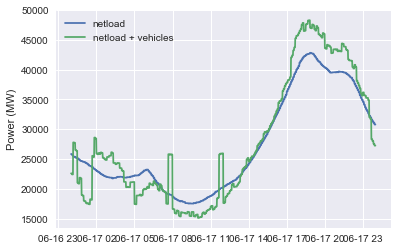

In [9]:
plt.plot(temp_netload['netload'], label='netload')
plt.plot(temp_result['netload'], label='netload + vehicles')
plt.ylabel('Power (MW)')
plt.legend()
plt.show()

In [18]:
temp_vehicle_demand = pandas.DataFrame(
    (myresult['vehicle_after_demand']) *    (1500000 / len(project.vehicles)) / (1000 * 1000))  # Scale up and W to MW
temp_vehicle_demand = temp_vehicle_demand.set_index(tempIndex)
 

temp_vehicle_generation = pandas.DataFrame(
    (-myresult['vehicle_after_generation']) *    (1500000 / len(project.vehicles)) / (1000 * 1000))  # Scale up and W to MW
temp_vehicle_generation = temp_vehicle_generation.set_index(tempIndex)
# temp_vehicle_generation.head()

vehicle_after_demand
2025-06-17 00:00:00           1650.421297
2025-06-17 00:01:00           1650.421297
2025-06-17 00:02:00           1650.421297
2025-06-17 00:03:00           1650.421297
2025-06-17 00:04:00           1650.421297